In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_global_rpc = pd.read_excel(r'C:\Users\ivan_pinar\Dropbox\Creación de MOCs\MOC Master Python Análisis de Datos\Datasets\CASO PRÁCTICO 2\df_global_rpc.xlsx')

In [8]:
df_global_rpc.head()

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad,Importe,Dif_env_comp,...,Ciudad,Estado,Código Postal,Región,Categoría,Sub-categoría,Nombre Producto,Coste Producción,Beneficio,Averagemonthlywage
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,261.960,2,523.920,3.208333,...,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156,63.723687,4893
1,CA-2017-110198,2021-05-01,2021-05-02 00:00:00,First Class,AG-10900,FUR-BO-10001798,314.352,3,943.056,1.000000,...,Tucson,Arizona,85705.0,West,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156,252.761531,4893
2,CA-2017-159793,2021-08-25,2021-08-29 00:00:00,Standard Class,SV-20365,FUR-BO-10001798,130.980,2,261.960,4.000000,...,Dover,Delaware,19901.0,East,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156,-198.236313,4893
3,CA-2016-117681,2020-04-09,2020-04-14 00:00:00,Standard Class,HF-14995,FUR-BO-10001798,556.665,5,2783.325,5.000000,...,NaN,NaN,NaN,NaN,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156,1632.834218,3478
4,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,731.940,3,2195.820,3.000000,...,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",563.102730,506.511811,4893


# PREGUNTA 1: A continuación importa el dataframe df_global_rpc y trate de visualizar las distribuciones estadísticas con un gráfico pairplot.

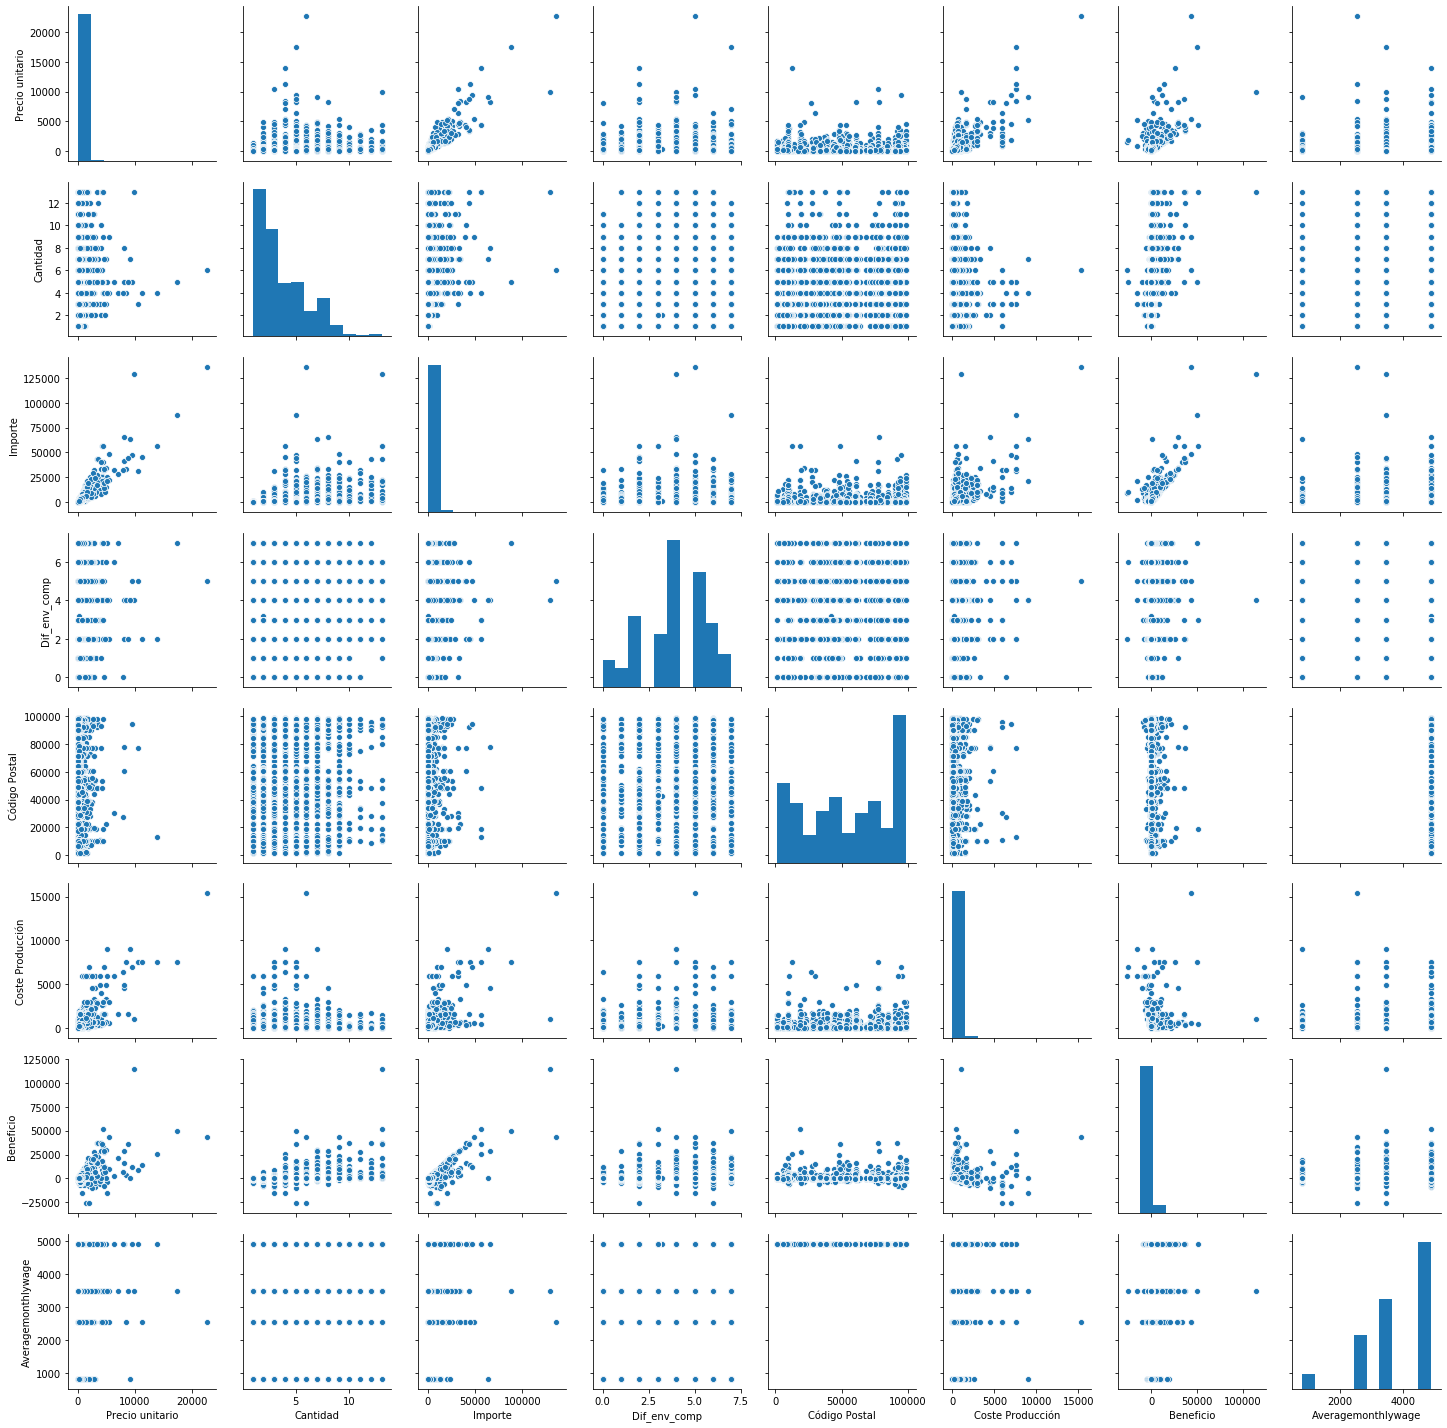

In [11]:
sns.pairplot(df_global_rpc)

# PREGUNTA 2: Compare visualmente el volumen de venta de los diferentes países

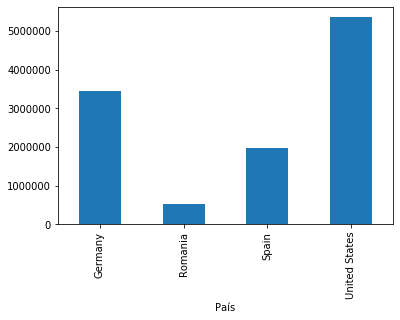

In [20]:
df_global_rpc.groupby("País")["Importe"].agg("sum").plot(kind="bar")

# PREGUNTA 3: Verifique la evolución del volumen de ventas por cada país:

In [29]:
df_global_rpc.groupby(["País",df_global_rpc["Fecha compra"].map(lambda x: x.year)])["Importe"].agg("sum")

País           Fecha compra
Germany        2018            6.315464e+05
               2019            6.678034e+05
               2020            1.088383e+06
               2021            1.055005e+06
Romania        2018            9.536653e+04
               2019            1.622525e+05
               2020            1.553674e+05
               2021            1.074529e+05
Spain          2018            4.670136e+05
               2019            3.652448e+05
               2020            5.008782e+05
               2021            6.355104e+05
United States  2018            1.215073e+06
               2019            1.143389e+06
               2020            1.266368e+06
               2021            1.731192e+06
Name: Importe, dtype: float64

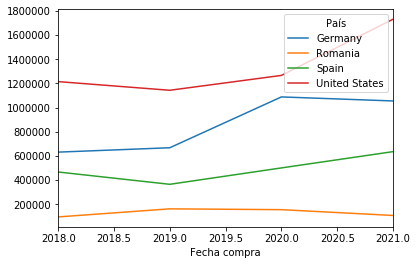

In [39]:
df_global_rpc.groupby(["País",df_global_rpc["Fecha compra"].map(lambda x: x.year)])["Importe"].agg("sum").unstack("País").plot()

# PREGUNTA 4: Crear un gráfico de box&whiskers para la variable “Importe” 

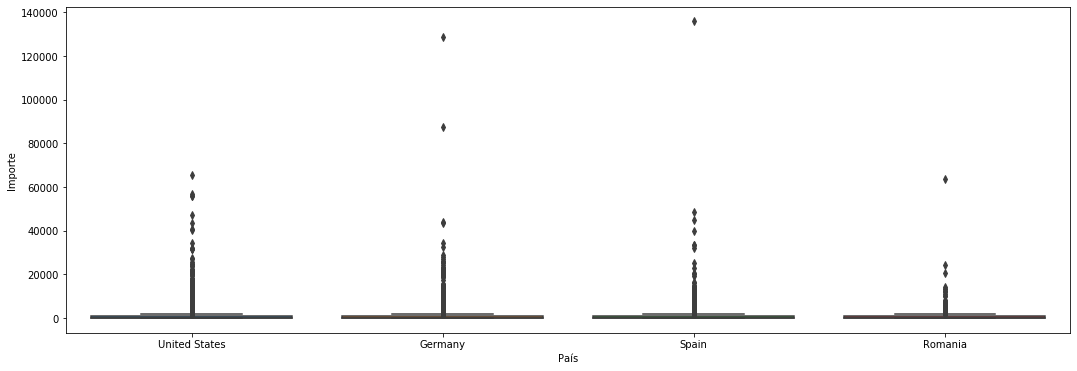

In [14]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df_global_rpc,x="País",y="Importe")

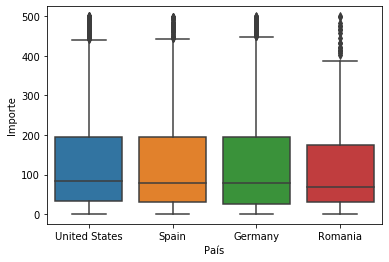

In [18]:
sns.boxplot(data=df_global_rpc[df_global_rpc["Importe"]<500],x="País",y="Importe")

# PREGUNTA 5: Represente un gráfico de densidad de probabilidad conjunta con jointplot de las variables Beneficio y Cantidad

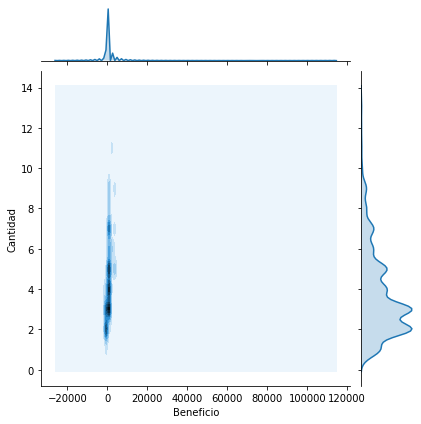

In [41]:
sns.jointplot(data=df_global_rpc,x="Beneficio",y="Cantidad",kind="kde")

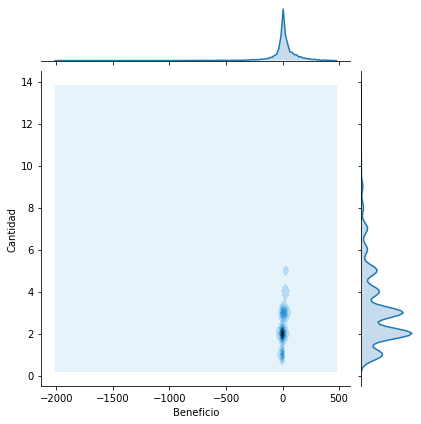

In [45]:
sns.jointplot(data=df_global_rpc[df_global_rpc["Importe"]<500],x="Beneficio",y="Cantidad",kind="kde")

# PREGUNTA 6: Realizar un gráfico de correlación para todas las variables numéricas de nuestro dataframe

In [42]:
corr = df_global_rpc.corr()

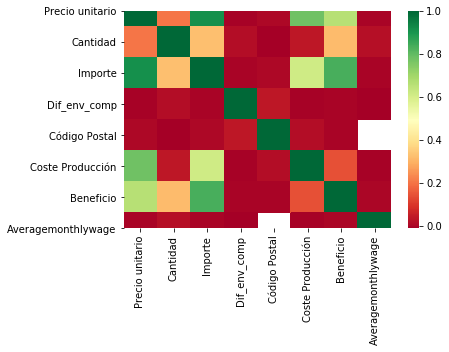

In [43]:
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap='RdYlGn') 